# Differential gene expression analysis

## Setup

In [18]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [2]:
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## Import data

In [3]:
file_path = "../datasets/E-MTAB-6863-raw-counts.tsv"
df = pd.read_csv(file_path, sep="\t", comment='#')
df.head()

Gene ID Gene Name  ERR2618748  ERR2618749  ERR2618751  ERR2618752  \
0  ENSG00000000003    TSPAN6        2230        1191        1592        1936   
1  ENSG00000000005      TNMD          12           6           5           2   
2  ENSG00000000419      DPM1         404         339         396         326   
3  ENSG00000000457     SCYL3         670         422         375         347   
4  ENSG00000000460  C1orf112         111         116          97          73   

   ERR2618753  ERR2618754  ERR2618755  ERR2618756  ERR2618757  ERR2618758  \
0        1506        1717        1489        1882        1109         364   
1           3           1           1          21          19           5   
2         343         335         292         491         275         381   
3         417         403         318         528         338         230   
4          64         108          38         153          86          77   

   ERR2618759  ERR2618760  ERR2618761  ERR2618762  ERR2618763  ERR2618764  \
0        1740        1311         921        1376        1133        1822   
1          13           2           0           1           6           4   
2         332         284         273         391         184         326   
3         347         285         434         372         214         407   
4          85          53          82          75          33         123   

   ERR2618765  ERR2618766  ERR2618781  ERR2618782  ERR2618784  ERR2618785  \
0        1490        1334        1241        1221        1901         797   
1           1          10           1           3           2          16   
2         345         257         419         263         430         233   
3         366         268         516         386         604         400   
4          56          49          92          94         242         115   

   ERR2618786  ERR2618787  ERR2618788  ERR2618789  ERR2618790  ERR2618791  \
0         858        1064         390        1517        1067         421   
1           4           0           2           0           1           1   
2         193         187          74         291         267          56   
3         303         222         127         180         336          37   
4          84          61          22          50         122          19   

   ERR2618802  ERR2618803  ERR2618804  ERR2618805  ERR2618806  ERR2618807  \
0         489         354        1584        1296        2202        1444   
1           1           3           8           2           8           3   
2         101          87         380         262         486         393   
3         178         175         598         379         623         272   
4          56          88         239         122         366         134   

   ERR2618808  ERR2618809  ERR2618810  ERR2618811  ERR2618814  ERR2618769  \
0        2015        1262        1262        1915         705        1084   
1          12           5           4           3           2           4   
2         431         287         192         325         102         124   
3         677         324         220         351         102         214   
4         199          99          37         139          29          76   

   ERR2618773  ERR2618783  ERR2618770  ERR2618774  ERR2618795  ERR2618813  \
0        1329         551        1795        1560         365        1123   
1           0           0           5           6           5           5   
2         263          96         372         272          77         290   
3         427         124         440         499          74         388   
4          73          47         159         100          30         109   

   ERR2618776  ERR2618779  ERR2618812  ERR2618777  ERR2618796  ERR2618797  \
0         537        1928        2536        1654         529         844   
1           5          11          35           8           2           1   
2         141         323         439         392         

In [11]:
# Examine all patients
file_path = "../datasets/E-MTAB-6863-experiment-design.tsv"
edf = pd.read_csv(file_path, sep="\t", comment='#')
# edf = edf[edf["Sample Characteristic[disease]"] == "non-alcoholic fatty liver disease"]
print(edf.shape)
edf.head()

(69, 46)


Run Sample Characteristic[age]  \
0  ERR2618748                    49 year   
1  ERR2618749                    53 year   
2  ERR2618750                    50 year   
3  ERR2618751                    64 year   
4  ERR2618752                    38 year   

   Sample Characteristic Ontology Term[age]  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

  Sample Characteristic[alcohol consumption]  \
0                           0 grams per week   
1                           0 grams per week   
2                              not available   
3                           0 grams per week   
4                           0 grams per week   

   Sample Characteristic Ontology Term[alcohol consumption]  \
0                                                       NaN   
1                                                       NaN   
2                                                       NaN   
3                                                       NaN   
4                                                       NaN   

  Sample Characteristic[alcohol consumption measurement]  \
0                                                      0   
1                                                      0   
2                                          not available   
3                                                      0   
4                                                      0   

   Sample Characteristic Ontology Term[alcohol consumption measurement]  \
0                                                                   NaN   
1                                                                   NaN   
2                                                                   NaN   
3                                                                   NaN   
4                                                                   NaN   

   Sample Characteristic[bmi code]  \
0                                0   
1                                1   
2                                0   
3                                1   
4                                0   

   Sample Characteristic Ontology Term[bmi code]  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  Sample Characteristic[body mass index]  \
0                                   24.1   
1                                  29.74   
2                          not available   
3                                   32.3   
4                                   22.6   

   Sample Characteristic Ontology Term[body mass index]  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   

  Sample Characteristic[cigarette packs per year]  \
0                      0 cigarette packs per year   
1                                   not available   
2                                   not available   
3                      0 cigarette packs per year   
4                      2 cigarette packs per year   

   Sample Characteristic Ontology Term[cigarette packs per year]  \
0                                                            NaN   
1                                                            NaN   
2                                                            NaN   
3                                                            NaN   
4                                                            NaN   

  Sample Characteristic[clinical information]  \
0                                no steatos

In [6]:
# Filter counts df by only non-alcoholic fatty liver disease patients
counts_df = df[["Gene ID"] + edf["Run"].tolist()].set_index("Gene ID")
print(counts_df.shape)
counts_df.head()

(58735, 69)


ERR2618748  ERR2618749  ERR2618750  ERR2618751  ERR2618752  \
Gene ID                                                                       
ENSG00000000003        2230        1191         829        1592        1936   
ENSG00000000005          12           6           2           5           2   
ENSG00000000419         404         339         165         396         326   
ENSG00000000457         670         422         222         375         347   
ENSG00000000460         111         116          69          97          73   

                 ERR2618753  ERR2618754  ERR2618755  ERR2618756  ERR2618757  \
Gene ID                                                                       
ENSG00000000003        1506        1717        1489        1882        1109   
ENSG00000000005           3           1           1          21          19   
ENSG00000000419         343         335         292         491         275   
ENSG00000000457         417         403         318         528         338   
ENSG00000000460          64         108          38         153          86   

                 ERR2618758  ERR2618759  ERR2618760  ERR2618761  ERR2618762  \
Gene ID                                                                       
ENSG00000000003         364        1740        1311         921        1376   
ENSG00000000005           5          13           2           0           1   
ENSG00000000419         381         332         284         273         391   
ENSG00000000457         230         347         285         434         372   
ENSG00000000460          77          85          53          82          75   

                 ERR2618763  ERR2618764  ERR2618765  ERR2618766  ERR2618767  \
Gene ID                                                                       
ENSG00000000003        1133        1822        1490        1334        2284   
ENSG00000000005           6           4           1          10           7   
ENSG00000000419         184         326         345         257         502   
ENSG00000000457         214         407         366         268         530   
ENSG00000000460          33         123          56          49          96   

                 ERR2618768  ERR2618769  ERR2618770  ERR2618771  ERR2618772  \
Gene ID                                                                       
ENSG00000000003        1154        1084        1795         913         679   
ENSG00000000005           2           4           5           4           0   
ENSG00000000419         253         124         372         173         108   
ENSG00000000457         381         214         440         194         243   
ENSG00000000460         101          76         159          51          27   

                 ERR2618773  ERR2618774  ERR2618775  ERR2618776  ERR2618777  \
Gene ID                                                                       
ENSG00000000003        1329        1560        1675         537        1654   
ENSG00000000005           0           6           2           5           8   
ENSG00000000419         263         272         244         141         392   
ENSG00000000457         427         499         416         389         479   
ENSG00000000460          73         100         102          79         110   

                 ERR2618778  ERR2618779  ERR2618780  ERR2618781  ERR2618782  \
Gene ID                                                                       
ENSG00000000003        1346        1928        1593        1241        1221   
ENSG00000000005           5          11           0           1           3   
ENSG00000000419         420         323         301         419         263   
ENSG00000000457         437         269         285         516         386   
ENSG00000000460         111          57          65          92          94   

                 ERR2618783  ERR2618784  ERR2618785  ERR2618786  ERR2618787  \
Gene ID                                                     

## EDA

In [7]:
# Check the distributions of read counts for each sample
summary_df = counts_df.describe().round()
summary_df.loc["sum"] = summary_df.loc["count"] * summary_df.loc["mean"]
summary_df

ERR2618748  ERR2618749  ERR2618750  ERR2618751  ERR2618752  ERR2618753  \
count     58735.0     58735.0     58735.0     58735.0     58735.0     58735.0   
mean        399.0       292.0       172.0       301.0       382.0       349.0   
std       11900.0      5742.0      5304.0     10076.0     11710.0      9509.0   
min           0.0         0.0         0.0         0.0         0.0         0.0   
25%           0.0         0.0         0.0         0.0         0.0         0.0   
50%           2.0         2.0         1.0         1.0         1.0         1.0   
75%          44.0        45.0        19.0        27.0        28.0        33.0   
max     2668770.0   1170743.0   1157565.0   2260307.0   2549560.0   2069515.0   
sum    23435265.0  17150620.0  10102420.0  17679235.0  22436770.0  20498515.0   

       ERR2618754  ERR2618755  ERR2618756  ERR2618757  ERR2618758  ERR2618759  \
count     58735.0     58735.0     58735.0     58735.0     58735.0     58735.0   
mean        329.0       283.0       361.0       261.0       239.0       286.0   
std        8047.0      6653.0     12224.0      8128.0      8904.0      8535.0   
min           0.0         0.0         0.0         0.0         0.0         0.0   
25%           0.0         0.0         0.0         0.0         0.0         0.0   
50%           1.0         1.0         1.0         1.0         2.0         1.0   
75%          28.0        20.0        32.0        29.0        32.0        29.0   
max     1695585.0   1318436.0   2779845.0   1816901.0   2067890.0   1926902.0   
sum    19323815.0  16622005.0  21203335.0  15329835.0  14037665.0  16798210.0   

       ERR2618760  ERR2618761  ERR2618762  ERR2618763  ERR2618764  ERR2618765  \
count     58735.0     58735.0     58735.0     58735.0     58735.0     58735.0   
mean        319.0       228.0       239.0       269.0       320.0       306.0   
std        7435.0      4961.0      5360.0      7383.0      9618.0      8565.0   
min           0.0         0.0         0.0         0.0         0.0         0.0   
25%           0.0         0.0         0.0         0.0         0.0         0.0   
50%           1.0         2.0         1.0         0.0         1.0         1.0   
75%          27.0        42.0        26.0        15.0        33.0        28.0   
max     1492601.0   1072733.0   1155746.0   1546056.0   2089781.0   1853154.0   
sum    18736465.0  13391580.0  14037665.0  15799715.0  18795200.0  17972910.0   

       ERR2618766  ERR2618767  ERR2618768  ERR2618769  ERR2618770  ERR2618771  \
count     58735.0     58735.0     58735.0     58735.0     58735.0     58735.0   
mean        240.0       419.0       255.0       178.0       306.0       159.0   
std        5852.0     13010.0      8455.0      5163.0     10107.0      5724.0   
min           0.0         0.0         0.0         0.0         0.0         0.0   
25%           0.0         0.0         0.0         0.0         0.0         0.0   
50%           1.0         2.0         1.0         2.0         1.0         0.0   
75%          19.0        42.0        28.0        22.0        28.0        14.0   
max     1171209.0   2907827.0   1921439.0   1111508.0   2285732.0   1232483.0   
sum    14096400.0  24609965.0  14977425.0  10454830.0  17972910.0   9338865.0   

       ERR2618772  ERR2618773  ERR2618774  ERR2618775  ERR2618776  ERR2618777  \
count     58735.0     58735.0     58735.0     58735.0     58735.0     58735.0   
mean        245.0       374.0       297.0       350.0       166.0       365.0   
std        5405.0      7962.0      6741.0     10167.0      3169.0     11955.0   
min           0.0         0.0         0.0         0.0         0.0         0.0   
25%           0.0         0.0         0.0         0.0         0.0         0.0   
50%           0.0         2.0         2.0         1.0         1.0         2.0   
75%          19.0        38.0        35.0        29.0        30.0        42.0   
max      933476.0   1501847.0   1381650.0   2219057.0    502520.0   2717822.0   
sum    14390075.0  21966890.0  174

In [10]:
# Check read count per sample by millions
summary_df.loc["sum"] / 1e6

ERR2618748    23.435265
ERR2618749    17.150620
ERR2618750    10.102420
ERR2618751    17.679235
ERR2618752    22.436770
ERR2618753    20.498515
ERR2618754    19.323815
ERR2618755    16.622005
ERR2618756    21.203335
ERR2618757    15.329835
ERR2618758    14.037665
ERR2618759    16.798210
ERR2618760    18.736465
ERR2618761    13.391580
ERR2618762    14.037665
ERR2618763    15.799715
ERR2618764    18.795200
ERR2618765    17.972910
ERR2618766    14.096400
ERR2618767    24.609965
ERR2618768    14.977425
ERR2618769    10.454830
ERR2618770    17.972910
ERR2618771     9.338865
ERR2618772    14.390075
ERR2618773    21.966890
ERR2618774    17.444295
ERR2618775    20.557250
ERR2618776     9.750010
ERR2618777    21.438275
ERR2618778    19.911165
ERR2618779    23.259060
ERR2618780    15.329835
ERR2618781    21.966890
ERR2618782    15.917185
ERR2618783     8.692780
ERR2618784    22.143095
ERR2618785    16.093390
ERR2618786    11.512060
ERR2618787    13.626520
ERR2618788     7.224405
ERR2618789    13

In [17]:
# Filter the data with a threshold of ≥10 counts per million (CPM) in at least 20 samples (29%)
# This is based on the paper
threshold = summary_df.loc["sum"]/1e6 * 10
counts_df1 = counts_df
filtered_df = counts_df[(counts_df1 > threshold).sum(axis=1) >= 20]
print(filtered_df.shape)
filtered_df.head()

(9813, 69)


ERR2618748  ERR2618749  ERR2618750  ERR2618751  ERR2618752  \
Gene ID                                                                       
ENSG00000000003        2230        1191         829        1592        1936   
ENSG00000000419         404         339         165         396         326   
ENSG00000000457         670         422         222         375         347   
ENSG00000000938         157         279         109          77         258   
ENSG00000000971       62001       27855       23001       52824       34486   

                 ERR2618753  ERR2618754  ERR2618755  ERR2618756  ERR2618757  \
Gene ID                                                                       
ENSG00000000003        1506        1717        1489        1882        1109   
ENSG00000000419         343         335         292         491         275   
ENSG00000000457         417         403         318         528         338   
ENSG00000000938         239         141         118         122         181   
ENSG00000000971       37544       31418       26071       57083       39032   

                 ERR2618758  ERR2618759  ERR2618760  ERR2618761  ERR2618762  \
Gene ID                                                                       
ENSG00000000003         364        1740        1311         921        1376   
ENSG00000000419         381         332         284         273         391   
ENSG00000000457         230         347         285         434         372   
ENSG00000000938          76         196         290         235         107   
ENSG00000000971        7673       44633       26587       26237       40226   

                 ERR2618763  ERR2618764  ERR2618765  ERR2618766  ERR2618767  \
Gene ID                                                                       
ENSG00000000003        1133        1822        1490        1334        2284   
ENSG00000000419         184         326         345         257         502   
ENSG00000000457         214         407         366         268         530   
ENSG00000000938         123         155         116         133         213   
ENSG00000000971       26343       35506       41400       18290       58411   

                 ERR2618768  ERR2618769  ERR2618770  ERR2618771  ERR2618772  \
Gene ID                                                                       
ENSG00000000003        1154        1084        1795         913         679   
ENSG00000000419         253         124         372         173         108   
ENSG00000000457         381         214         440         194         243   
ENSG00000000938         112          58         110          58         183   
ENSG00000000971       32621       23859       62585       23966       13551   

                 ERR2618773  ERR2618774  ERR2618775  ERR2618776  ERR2618777  \
Gene ID                                                                       
ENSG00000000003        1329        1560        1675         537        1654   
ENSG00000000419         263         272         244         141         392   
ENSG00000000457         427         499         416         389         479   
ENSG00000000938         312         221          89         115         263   
ENSG00000000971       29158       49888       44749       15711       58148   

                 ERR2618778  ERR2618779  ERR2618780  ERR2618781  ERR2618782  \
Gene ID                                                                       
ENSG00000000003        1346        1928        1593        1241        1221   
ENSG00000000419         420         323         301         419         263   
ENSG00000000457         437         269         285         516         386   
ENSG00000000938         139         203         192         105         163   
ENSG00000000971       40032       37498       25443       51637       45349   

                 ERR2618783  ERR2618784  ERR2618785  ERR2618786  ERR2618787  \
Gene ID                                                     

The paper identified a total of 9,624 genes passing this criterion, while I detected 9,813 genes. Not sure where the small discrepancy are coming from. 

### PCA analysis

In [31]:
pca = PCA(n_components=3)
normalized_df=pd.DataFrame(StandardScaler().fit_transform(filtered_df.T))

pca.fit(normalized_df)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.56148214 0.15327963 0.06650197]
[616.58565564 322.15706524 212.1986926 ]


In [32]:
projected = pca.fit_transform(normalized_df)
print(normalized_df.shape)
print(projected.shape)

(69, 9813)
(69, 3)


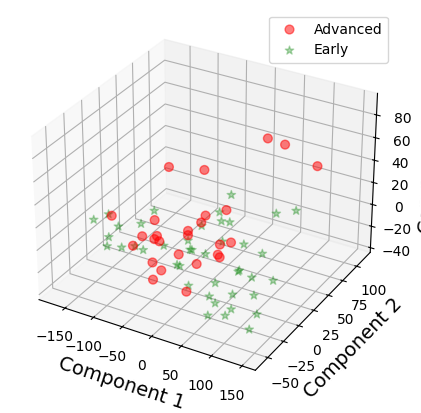

In [109]:
y=edf["Sample Characteristic[disease staging]"]

ex_variance=np.var(projected,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = projected[:,0]
Yax = projected[:,1]
Zax = projected[:,2]

cdict = {'early':'green','advanced':'red'}
label = {'early':'Early','advanced':'Advanced'}
marker = {'early':'*','advanced':'o'}
alpha = {'early':.3, 'advanced':.5}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=label[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("Component 1", fontsize=14)
ax.set_ylabel("Component 2", fontsize=14)
ax.set_zlabel("Component 3", fontsize=14)

ax.legend()
plt.show()

The PCA separateion is not as obvious as in the paper. A couple of things to try:
* Other pca packages
* An interactive widget to look at the 3d plot from different angles

## Differential expression analysis

In [43]:
# Transform the data to be sample as rows and genes as columns
filtered_df = filtered_df.T
print(filtered_df.shape)
filtered_df.head()

(69, 9813)


Gene ID     ENSG00000000003  ENSG00000000419  ENSG00000000457  \
ERR2618748             2230              404              670   
ERR2618749             1191              339              422   
ERR2618750              829              165              222   
ERR2618751             1592              396              375   
ERR2618752             1936              326              347   

Gene ID     ENSG00000000938  ENSG00000000971  ENSG00000001036  \
ERR2618748              157            62001              899   
ERR2618749              279            27855              817   
ERR2618750              109            23001              296   
ERR2618751               77            52824              650   
ERR2618752              258            34486              790   

Gene ID     ENSG00000001084  ENSG00000001167  ENSG00000001461  \
ERR2618748             3247              503              382   
ERR2618749             1782              390              587   
ERR2618750             1622              187              149   
ERR2618751             2281              345              282   
ERR2618752             2522              377              290   

Gene ID     ENSG00000001497  ENSG00000001561  ENSG00000001617  \
ERR2618748              408              348              212   
ERR2618749              477              223              172   
ERR2618750              179              149               54   
ERR2618751              333              221              129   
ERR2618752              404              152              261   

Gene ID     ENSG00000001626  ENSG00000001629  ENSG00000001630  \
ERR2618748              559             1235              258   
ERR2618749             2523              920              116   
ERR2618750              126              480              152   
ERR2618751              383              728              238   
ERR2618752               26              775              356   

Gene ID     ENSG00000001631  ENSG00000002016  ENSG00000002330  \
ERR2618748              233              329              259   
ERR2618749              115              303              263   
ERR2618750              104              136               79   
ERR2618751              140              220              208   
ERR2618752               98              175              308   

Gene ID     ENSG00000002549  ENSG00000002586  ENSG00000002822  \
ERR2618748             6603             1902              479   
ERR2618749             3653             1941              424   
ERR2618750             1752              501              150   
ERR2618751             3939             1260              302   
ERR2618752             5894             1715              466   

Gene ID     ENSG00000002834  ENSG00000002919  ENSG00000002933  \
ERR2618748             2151              282             7107   
ERR2618749             2482              359             4400   
ERR2618750              821              141             2858   
ERR2618751             1643              222             4667   
ERR2618752             2631              349             5402   

Gene ID     ENSG00000003056  ENSG00000003147  ENSG00000003393  \
ERR2618748              983              297             2381   
ERR2618749             1136              249             1096   
ERR2618750              335               36              721   
ERR2618751              617               73             1405   
ERR2618752              969               71             1132   

Gene ID     ENSG00000003400  ENSG00000003402  ENSG00000003436  \
ERR2618748              656             4558             7542   
ERR2618749              678             3984             2368   
ERR2618750              238             2024             3023   
ERR2618751              387             2540             4537   
ERR2618752              530             3264             3626   

Gene ID     ENSG00000003509  ENSG00000003756  ENSG00000003989  \
ERR2618748              3

In [44]:
# Prep the metadata to have the groups to run differential expression on
metadata = edf[["Run","Sample Characteristic[disease]", "Sample Characteristic[disease staging]"]]
metadata = metadata.rename(columns={"Sample Characteristic[disease]": "condition", 
                         "Sample Characteristic[disease staging]": "stage"})
metadata = metadata.set_index("Run")
print(metadata.shape)
metadata.head()

(69, 2)


condition     stage
Run                                
ERR2618748  liver disease     early
ERR2618749  liver disease  advanced
ERR2618750  liver disease  advanced
ERR2618751  liver disease  advanced
ERR2618752  liver disease     early

In [46]:
dds = DeseqDataSet(
    counts=filtered_df,
    metadata=metadata,
    design_factors="stage",
)

In [47]:
dds.deseq2()

Fitting size factors...
... done in 0.08 seconds.

Fitting dispersions...
... done in 8.85 seconds.

Fitting dispersion trend curve...
... done in 0.41 seconds.

Fitting MAP dispersions...
... done in 11.23 seconds.

Fitting LFCs...
... done in 4.63 seconds.

Calculating cook's distance...
... done in 0.11 seconds.

Replacing 83 outlier genes.

Fitting dispersions...
... done in 0.17 seconds.

Fitting MAP dispersions...
... done in 0.19 seconds.

Fitting LFCs...
... done in 0.09 seconds.



In [48]:
print(dds)

AnnData object with n_obs × n_vars = 69 × 9813
    obs: 'condition', 'stage'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'


In [110]:
dds

AnnData object with n_obs × n_vars = 69 × 9813
    obs: 'condition', 'stage'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'

In [50]:
stat_res = DeseqStats(dds, independent_filter=False)

In [51]:
stat_res.summary()
stat_res.results_df[:10]

Running Wald tests...
... done in 1.36 seconds.



Log2 fold change & Wald test p-value: stage early vs advanced
                     baseMean  log2FoldChange     lfcSE      stat  \
Gene ID                                                             
ENSG00000000003  1.187235e+03        0.092305  0.097067  0.950937   
ENSG00000000419  2.496626e+02       -0.089383  0.088100 -1.014559   
ENSG00000000457  3.071495e+02       -0.049710  0.070192 -0.708205   
ENSG00000000938  1.263228e+02       -0.138835  0.121916 -1.138773   
ENSG00000000971  3.097971e+04       -0.006717  0.124654 -0.053888   
ENSG00000001036  4.912307e+02        0.003691  0.077266  0.047772   
ENSG00000001084  2.076178e+03        0.251443  0.087519  2.873000   
ENSG00000001167  2.672599e+02       -0.081051  0.074192 -1.092452   
ENSG00000001461  2.491922e+02       -0.298977  0.059114 -5.057645   
ENSG00000001497  2.946843e+02        0.172460  0.060118  2.868719   
ENSG00000001561  1.959839e+02       -0.508734  0.146973 -3.461413   
ENSG00000001617  1.386244e+02        0.28

baseMean  log2FoldChange     lfcSE      stat  \
Gene ID                                                             
ENSG00000000003   1187.235403        0.092305  0.097067  0.950937   
ENSG00000000419    249.662645       -0.089383  0.088100 -1.014559   
ENSG00000000457    307.149513       -0.049710  0.070192 -0.708205   
ENSG00000000938    126.322769       -0.138835  0.121916 -1.138773   
ENSG00000000971  30979.713322       -0.006717  0.124654 -0.053888   
ENSG00000001036    491.230702        0.003691  0.077266  0.047772   
ENSG00000001084   2076.178491        0.251443  0.087519  2.873000   
ENSG00000001167    267.259890       -0.081051  0.074192 -1.092452   
ENSG00000001461    249.192239       -0.298977  0.059114 -5.057645   
ENSG00000001497    294.684258        0.172460  0.060118  2.868719   

                       pvalue      padj  
Gene ID                                  
ENSG00000000003  3.416363e-01  0.492866  
ENSG00000000419  3.103163e-01  0.461524  
ENSG00000000457  4.788180e-01  0.620446  
ENSG00000000938  2.547980e-01  0.404781  
ENSG00000000971  9.570245e-01  0.974270  
ENSG00000001036  9.618982e-01  0.977409  
ENSG00000001084  4.065945e-03  0.023131  
ENSG00000001167  2.746345e-01  0.424809  
ENSG00000001461  4.244658e-07  0.000028  
ENSG00000001497  4.121376e-03  0.023324

In [63]:
results_df = stat_res.results_df.sort_values(by=["padj"])
results_df.head(10)

baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Gene ID                                                                         
ENSG00000038427  330.953471       -1.431967  0.158153 -9.054302  1.374435e-19   
ENSG00000122870  223.214305       -1.555669  0.197368 -7.882062  3.220220e-15   
ENSG00000131711  185.533272       -1.384358  0.182942 -7.567209  3.813295e-14   
ENSG00000146038  161.394527       -1.757316  0.232710 -7.551522  4.302001e-14   
ENSG00000196569  700.227039       -1.287160  0.174549 -7.374198  1.653373e-13   
ENSG00000001626  248.437738       -1.999495  0.273523 -7.310148  2.668484e-13   
ENSG00000172009  512.371167        0.874585  0.119680  7.307687  2.717794e-13   
ENSG00000064651  398.261501       -1.107762  0.151089 -7.331833  2.270256e-13   
ENSG00000184384  168.272599       -0.787353  0.108908 -7.229552  4.845901e-13   
ENSG00000162391  273.334295        2.426969  0.337317  7.194925  6.249515e-13   

                         padj  
Gene ID                        
ENSG00000038427  1.348733e-15  
ENSG00000122870  1.580001e-11  
ENSG00000131711  1.055388e-10  
ENSG00000146038  1.055388e-10  
ENSG00000196569  3.244909e-10  
ENSG00000001626  3.333714e-10  
ENSG00000172009  3.333714e-10  
ENSG00000064651  3.333714e-10  
ENSG00000184384  5.283647e-10  
ENSG00000162391  6.132649e-10

### Volcano plot

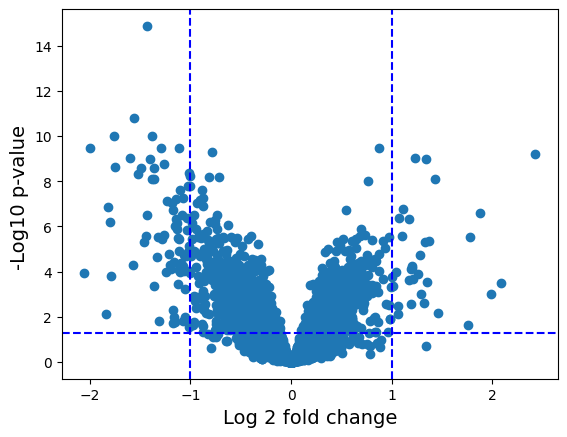

In [81]:
plt.scatter(results_df.log2FoldChange, -np.log10(results_df.padj))
plt.xlabel("Log 2 fold change", fontsize=14)
plt.ylabel("-Log10 p-value ", fontsize=14)

plt.axvline(x=1, color='b', linestyle='--')
plt.axvline(x=-1, color='b', linestyle='--')
plt.axhline(y=-np.log10(0.05), color='b', linestyle='--')

plt.show()

In [91]:
sum(results_df.padj < 0.05)

2342

In [94]:
sum(results_df.padj < 0.00001)

115

In [93]:
-np.log10(0.00001)

np.float64(5.0)

    Based on their Figure 1B, it is unclear what adjusted p-value they are using to call "significant", as it has a -log10 value of a little over 5. Using a cutoff of 0.00001, I can get a comparable number (115) of significant differentially expressed genes (DEGs) to their result 168. And using a more traditional cutoff 0f 0.05, I am getting a comparable number (2342) of "The less stringent FDR-corrected analysis revealed 1,595 DEGs".

    But overall, it seems like results from Python and R are giving comparable results with small discrepancies probably due to implentation details between Python and R. 

### Heatmap

In [171]:
# Plot heatmap with only significant genes
sig_genes = results_df[results_df.padj < 0.00001].index.tolist()

# keep only significant genes and transpose so genes are rows
heatmap_df = filtered_df[sig_genes].T

# merge dataframes to get gene names
heatmap_df = heatmap_df.reset_index().merge(df[["Gene ID", "Gene Name"]], on="Gene ID", how = "left") 

# remove gene with no names
heatmap_df = heatmap_df[~heatmap_df["Gene Name"].isna()] 

# remove gene id and set gene name as index
heatmap_df = heatmap_df[heatmap_df.columns[1:]].set_index("Gene Name") 

# Sort by stages: advanced vs early
heatmap_df = heatmap_df[metadata.sort_values("stage", ascending=False).index.tolist()] 

heatmap_df.head()

ERR2618748  ERR2618798  ERR2618779  ERR2618781  ERR2618783  \
Gene Name                                                               
VCAN              418         182         477         108          69   
BICC1             405          97         268         109          27   
MAP1B             377          68         219         151          70   
DCDC2             341          57         223         119           5   
LAMA2            1355         428        1076         497         149   

           ERR2618784  ERR2618787  ERR2618791  ERR2618792  ERR2618793  \
Gene Name                                                               
VCAN              372         251          47         139         343   
BICC1             395         124          23          95         215   
MAP1B             148          93          15          74         117   
DCDC2             227          66          18          33         127   
LAMA2             930         609          74         298         568   

           ERR2618795  ERR2618796  ERR2618797  ERR2618799  ERR2618777  \
Gene Name                                                               
VCAN               43          80         150         130         420   
BICC1              13          44          59          41         429   
MAP1B              21         106          85          68         318   
DCDC2              11           8          46          25         212   
LAMA2             106         188         237         318        1596   

           ERR2618800  ERR2618802  ERR2618803  ERR2618804  ERR2618805  \
Gene Name                                                               
VCAN              296          96          54         218         300   
BICC1             227          67          85         106         143   
MAP1B              91          38          76         155         113   
DCDC2              97          44          22          65         123   
LAMA2             491         177         219         419         457   

           ERR2618806  ERR2618808  ERR2618810  ERR2618812  ERR2618814  \
Gene Name                                                               
VCAN              431         567         137         320          67   
BICC1             307         419         119         154          20   
MAP1B             273         250         131         143          33   
DCDC2             152         290          61          82          18   
LAMA2             819         882         467         613         163   

           ERR2618815  ERR2618778  ERR2618782  ERR2618764  ERR2618768  \
Gene Name                                                               
VCAN              171         180         239         245         221   
BICC1              63         138         190         327         167   
MAP1B             102         101         187         170         130   
DCDC2              19          86         105         248         128   
LAMA2             660         354         530         583         410   

           ERR2618752  ERR2618753  ERR2618754  ERR2618756  ERR2618759  \
Gene Name                                                               
VCAN              273         338         280         173         232   
BICC1             126         194         152         107          93   
MAP1B             124         217         116         120          82   
DCDC2             128         120          60          77          60   
LAMA2             407        1104         456         457         395   

           ERR2618762  ERR2618763  ERR2618775  ERR2618767  ERR2618816  \
Gene Name                                                               
VCAN              224         144         242         457         129   
BICC1             172          59         104         357          28   
MAP1B             105         190          77         226          38   
DCDC2             301          52          69         258     

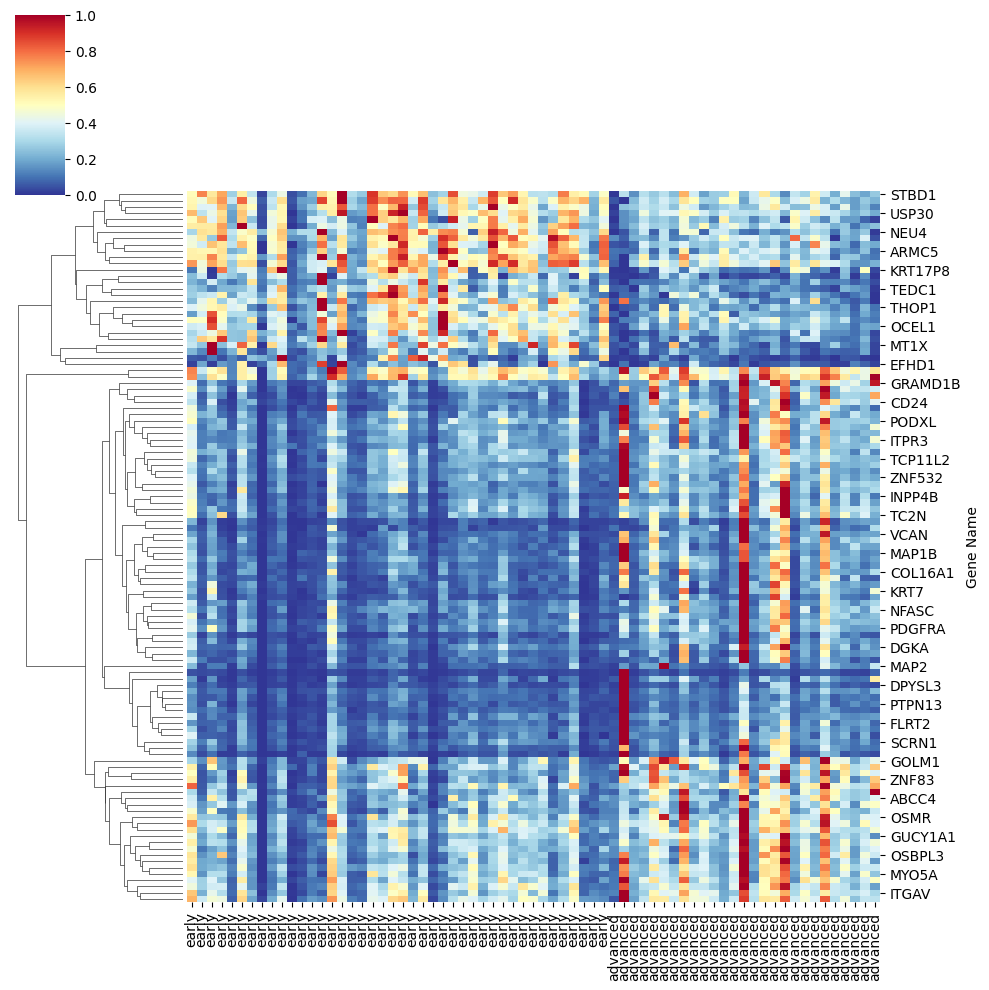

In [177]:
# Default plot
sns.clustermap(heatmap_df, standard_scale=0, cmap = 'RdYlBu_r', col_cluster=False, 
               xticklabels=metadata.sort_values("stage", ascending=False)["stage"].tolist())

# Show the graph
plt.show()

The graph looks very similar to what's in the paper. It could probably use some twicking to make it look better.

## Preparing gene list for enrichment analysis

In [118]:
# # Gene name mapping from other sources
# from sanbomics.tools import id_map
# mapper = id_map(species = 'human')

# x = df[['Gene ID', 'Gene Name']][df['Gene ID'].isin(results_df.iloc[:99].index.tolist())]
# x['Symbol'] = x['Gene ID'].map(mapper.mapper) 
# x

In [192]:
# For enrichment analysis, keep the less stringent DEGs
sig_genes1 = results_df[results_df.padj < 0.05].index.tolist()

# keep only significant genes and transpose so genes are rows
gene_df = filtered_df[sig_genes1]

gene_list = df['Gene Name'][(df['Gene ID'].isin(gene_df.columns.tolist())) & (~df['Gene Name'].isna())].tolist()

In [197]:
with open('../outputs/gene_list.pkl', 'wb') as f:
    pkl.dump(gene_list, f)